# Cap Tag Report

Run a cap tag report (same output as in Excel).
    
**Inputs** 
1. PR number and revision in form: PR_rev, i.e. '1-IWH6ME_2'
2. Directory to write cap tag report .csv file to, i.e. 'C:\\Users\\wb5888\\Documents\\Cap Tags'

**Outputs**
1. On-screen cap tag report
2. Report exported as .csv file with name CP_PR_rev.csv, i.e. '1-IWH6ME_2.csv' to directory provided above

### Input PR_rev and specify directory

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import CapTags as ct
import numpy as np
import datetime as dt
import pandas as pd
import os

pr_rev = '1-IE76TZ_5'

write_dir = '/home/jupyter-engiela/LA-tools/CapReports'
data_dir = '/home/jupyter-engiela/LA-tools/CapReports'

### View Report

View report that will be exported.

In [ ]:
report = ct.get_report(pr_rev)
print('found {} accounts.'.format(len(np.unique(report.AccountID))))
report

### Check Dates

Ensure tags for all meters cover PR start and end dates.

In [38]:
date_errors = ct.checkPRdates(report, pr_rev)

cap tags cover PR start & end dates for all accts in 1-IE76TZ_5


## Export Report to *write_dir*

In [39]:
ct.export_report(pr_rev, write_dir)

saved file as CP_1-IE76TZ_5.csv


# Offer Summary

Download forecasts (~4s *per meter*), check tags & peaks, graph.

**Inputs** 
1. PR number and revision in form: PR_rev, i.e. '1-IWH6ME_2'
2. Tag Report (from above, as dataframe)

**Outputs**
1. Meter forecasts in /write_dir/PR_rev
2. Problem meters & plots (on-screen)

In [40]:
meters, idr_dir = ct.download_idr(pr_rev, report, data_dir)

created directory: C:\Users\wb5888\Documents\Cap Tags\data\1-IE76TZ_5_CH3
downloading forecasts for 2 meters...
expect to take 6.8 seconds.
download complete


## Merge forecasts into df

In [41]:
master_idr = ct.merge_idr(meters, idr_dir)
master_idr.head()

importing and merging .csv's...
read in and merged ch 3.


NEPOOL_PSNH_80047480480  NEPOOL_PSNH_80058690175
time                                                                 
2019-01-01 01:00:00                 3.170239               190.100000
2019-01-01 02:00:00                 3.019275               188.450000
2019-01-01 03:00:00                 3.170239               186.800000
2019-01-01 04:00:00                 3.170239               205.386752
2019-01-01 05:00:00                 3.321202               214.900000

## Run offer summary

**offer_summary()** function takes parameters **min_cp** and **min_diff**, which are the minimum tag values and minimum percent differences to look at.

                         Annual_Use_MWh  Act_Peak       CP      Tag  \
AccountID                                                             
NEPOOL_PSNH_80047480480          35.945     7.099    4.262    6.774   
NEPOOL_PSNH_80058690175        4087.552   857.700  576.600  677.407   

                         Act_Tag_Diff  Cap_Tag_Diff  
AccountID                                            
NEPOOL_PSNH_80047480480      4.797756    -37.082964  
NEPOOL_PSNH_80058690175     26.615166    -14.881305  
PR has total usage of 4123.497 MWh.
PR has an estimated tag total of 684.181 kWh.
PR has CP peak sum of 580.862 kWh.
PR has peak (sum(act_peak)) of 864.799 kWh, and 2 meters.
graphing forecasts...


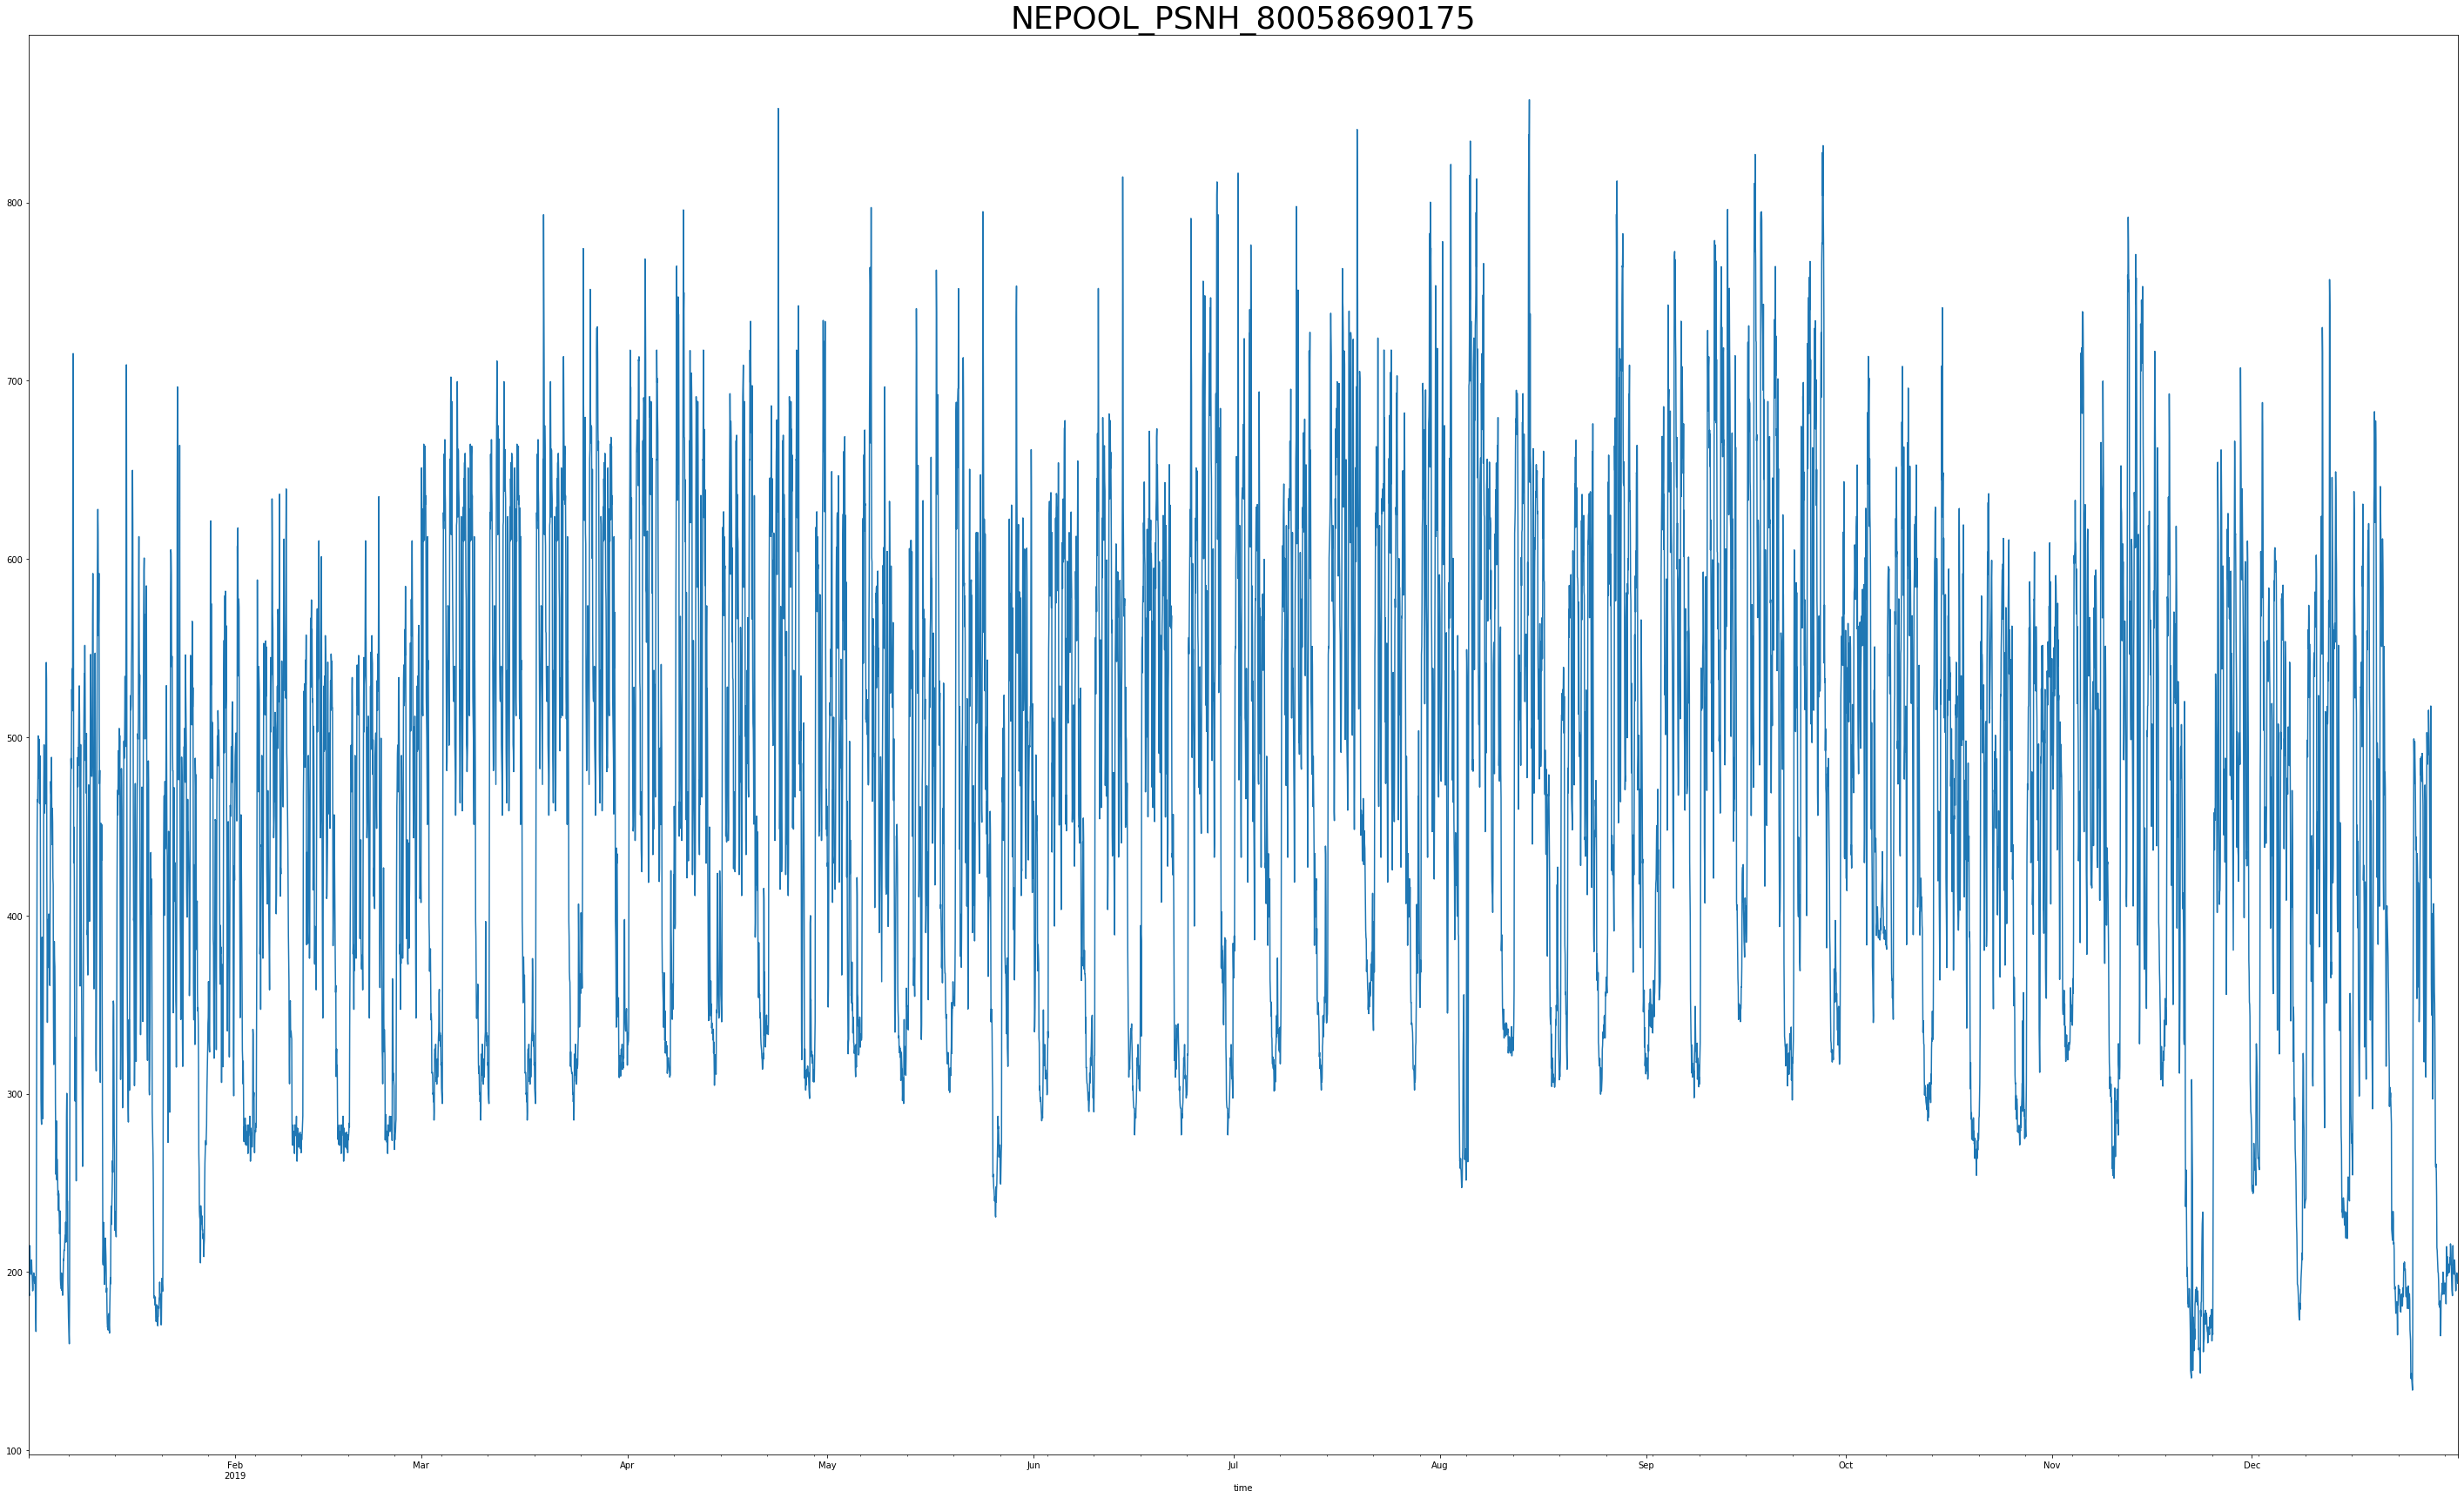

In [42]:
problem_meters = ct.offer_summary(master_idr, report, 0, 0)

## Look at problem meters

In [43]:
problem_meters

Annual_Use_MWh  Act_Peak     CP      Tag  \
AccountID                                                           
NEPOOL_PSNH_80058690175        4087.552     857.7  576.6  677.407   

                         Act_Tag_Diff  Cap_Tag_Diff  
AccountID                                            
NEPOOL_PSNH_80058690175     26.615166    -14.881305

In [31]:
list(problem_meters.index)

['NEPOOL_CLP_51035435080_777113004',
 'NEPOOL_CLP_51503524027_254282008',
 'NEPOOL_CLP_51937285013_647423006']

In [ ]:
#reset axis
#plt.gcf().gca() 

## Backup graph, for offer summary plot errors

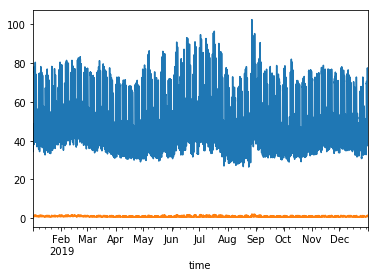

In [8]:
probs = problem_meters.index

for m in problem_meters.index:
    try:
        tmp = master_idr[m]
        tmp.plot(y = m)
    except:
        pass

## Individual Meter Plot

In [9]:
p = len(probs)
i = 0
print('working with {} meters.'.format(p))

working with 2 meters.


Iterate through probs (pd.series) and plot problem meters.

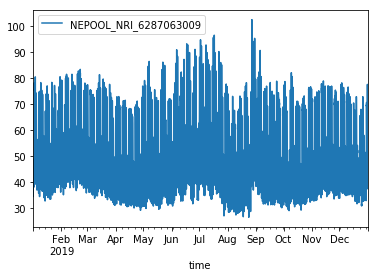

In [10]:
master_idr.plot(y = probs[i])
i+=1

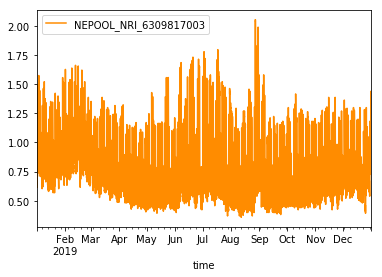

In [11]:
master_idr.plot(y = probs[i], color = 'darkorange')
i +=1

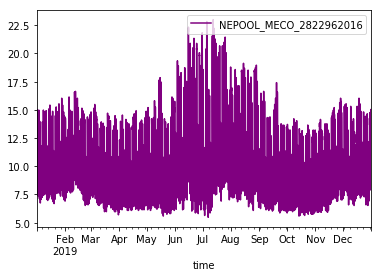

In [31]:
master_idr.plot(y = probs[i], color = "purple")
i += 1
#etc...

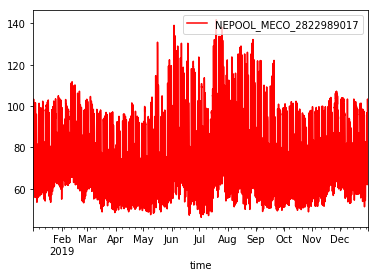

In [32]:
master_idr.plot(y = probs[i], color = "red")
i += 1

In [33]:
print('plotted {} out of {} meters...'.format(i, p))

plotted 4 out of 10 meters...


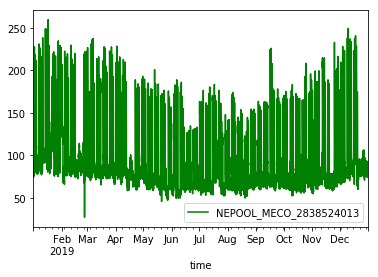

In [34]:
master_idr.plot(y = probs[i], color = "green")
i += 1

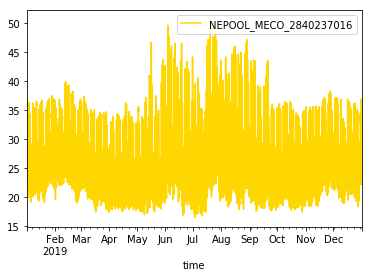

In [35]:
master_idr.plot(y = probs[i], color = "gold")
i += 1

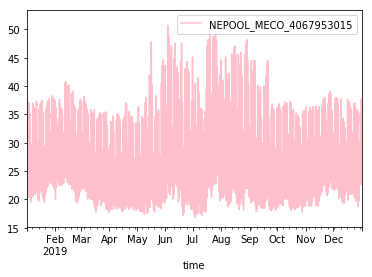

In [36]:
master_idr.plot(y = probs[i], color = "pink")
i += 1

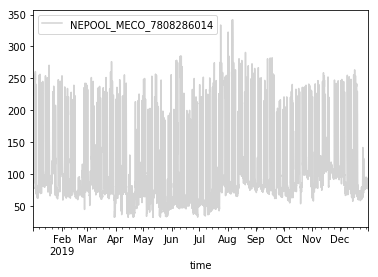

In [37]:
master_idr.plot(y = probs[i], color = "lightgray")
i += 1

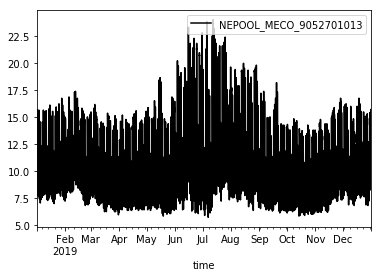

In [39]:
master_idr.plot(y = probs[i], color = "black")
i += 1

In [38]:
print('plotted {} out of {} meters...'.format(i, p))

plotted 8 out of 10 meters...


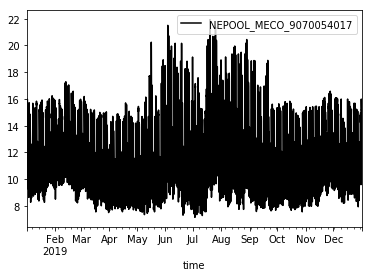

In [40]:
master_idr.plot(y = probs[i], color = "black")
i += 1

In [ ]:
print('plotted {} out of {} meters...'.format(i, p))

# TO DO

1. expand tag date functionality to all markets
2. split offer summary function up for API/package